# Data cleaning, EDA, modeling

## Data Cleaning

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import datetime
import os
import glob
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load data to a dataframe
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.shape

(110527, 14)

In [3]:
df.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
# Check how many patients_ids are not integers
df[~ df.PatientId.apply(lambda x: x.is_integer())]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


In [6]:
#Convert float to integer
def float_to_int(x):
    return int(x)

df["PatientId"] = df["PatientId"].apply(lambda x: float_to_int(x))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Convert patient_id from float to int
df["PatientId"] = df["PatientId"].astype('int64')

# Check if the patient_id is int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [8]:
#convert object to datetime
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"], utc = True)
df["AppointmentDay"]= pd.to_datetime(df["AppointmentDay"], utc = True)

In [9]:
df["AppointmentDate"] = [datetime.datetime.date(d) for d in df["AppointmentDay"]]
df["ScheduledDate"] = [datetime.datetime.date(d) for d in df["ScheduledDay"]]

In [10]:
df["ScheduledDay"]

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [11]:
df[:5]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,ScheduledDate
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29


In [12]:
#check any nulls in the dataset
df.isnull().sum()

PatientId          0
AppointmentID      0
Gender             0
ScheduledDay       0
AppointmentDay     0
Age                0
Neighbourhood      0
Scholarship        0
Hipertension       0
Diabetes           0
Alcoholism         0
Handcap            0
SMS_received       0
No-show            0
AppointmentDate    0
ScheduledDate      0
dtype: int64

In [13]:
# Calculate waiting time in  number of days
df["Awaitingtime"] = ((df.AppointmentDate - df.ScheduledDate).dt.days) 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   PatientId        110527 non-null  int64              
 1   AppointmentID    110527 non-null  int64              
 2   Gender           110527 non-null  object             
 3   ScheduledDay     110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay   110527 non-null  datetime64[ns, UTC]
 5   Age              110527 non-null  int64              
 6   Neighbourhood    110527 non-null  object             
 7   Scholarship      110527 non-null  int64              
 8   Hipertension     110527 non-null  int64              
 9   Diabetes         110527 non-null  int64              
 10  Alcoholism       110527 non-null  int64              
 11  Handcap          110527 non-null  int64              
 12  SMS_received     110527 non-null  int64              
 13 

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,ScheduledDate,Awaitingtime
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0


In [16]:
#Finding any date discrepancy
#waiting time less than 0 indicates appointment time less than scheduling time 
#which is not possible
(df[df["Awaitingtime"] < 0])#Remove them
df = df[~ df["Awaitingtime"] < 0]
print(df.shape)

(110522, 17)


In [17]:
# Select the target variable and drop it from the df for data wrangling
#df1["No-show"] = df1["No-show"].map({'Yes': 1, 'No': 0})

In [18]:
# Create Weekday column
df["Weekday"] = df["AppointmentDay"].dt.weekday

In [ ]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df1.iloc[].corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("data", fontsize=14)
plt.show()

## Exploratory Data Analysis

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Lets save cleaned data as CSV
df.to_csv("No_show.csv")

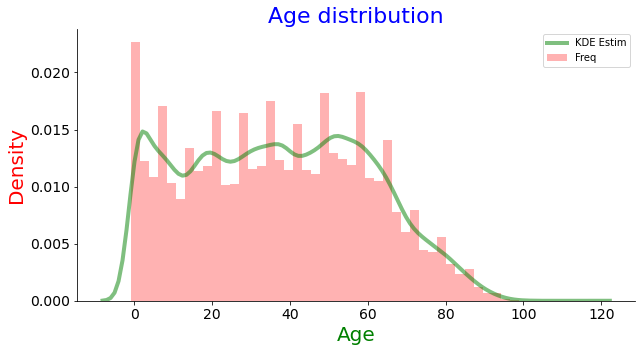

In [21]:
# How many patients of each age
g=sns.distplot(df["Age"],
               kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
               hist_kws={"color":"r","alpha":0.3,"label":"Freq"})


# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(10,5)
# Set the Title of the graph from here
g.axes.set_title('Age distribution', fontsize=22,color="b")
# Set the xlabel of the graph from here
g.set_xlabel("Age",size = 20,color="g")
# Set the ylabel of the graph from here
g.set_ylabel("Density",size = 20,color="r")
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

In [22]:
#who skipped most of the appointments male or female?
ByGender = pd.DataFrame(df.groupby(["Gender", "No-show"])["No-show"]
                        .count().reset_index(name = "Count"))
ByGender

,Gender,No-show,Count
0,F,No,57246
1,F,Yes,14591
2,M,No,30962
3,M,Yes,7723


- Both male and female have equally skipped appointments

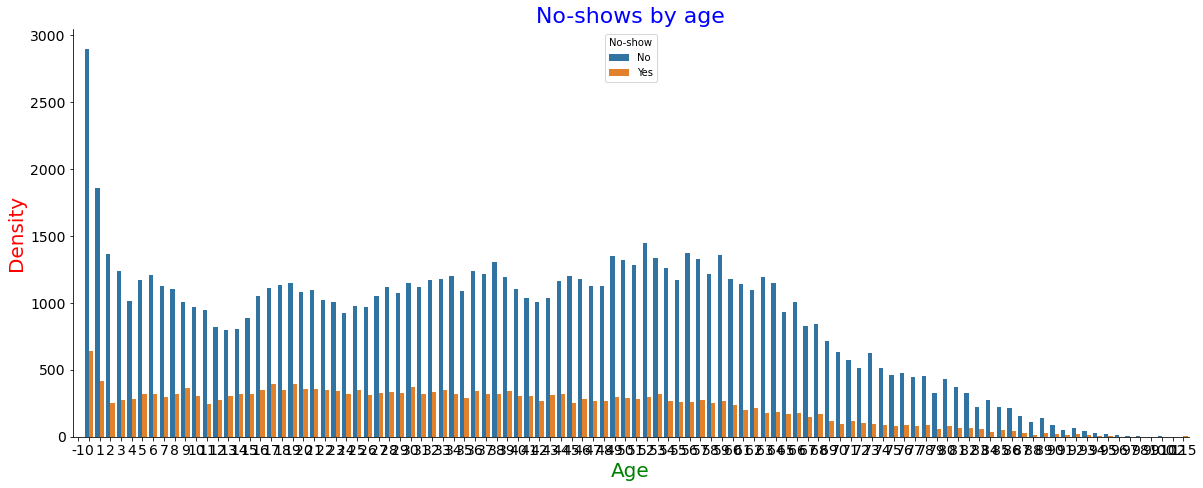

In [23]:
#How many No-shows by age
ByAge = pd.DataFrame(df.groupby(["Age", "No-show"])["No-show"]
                     .count()
                     .reset_index(name = "count"))

#Let's visualise via barplot
g = sns.barplot("Age","count", data = ByAge, hue = "No-show")
sns.despine()
g.figure.set_size_inches(20,7.5)
g.axes.set_title('No-shows by age', fontsize=22,color="b")
g.set_xlabel("Age",size = 20,color="g")
g.set_ylabel("Density",size = 20,color="r")
g.tick_params(labelsize=14,labelcolor="black")

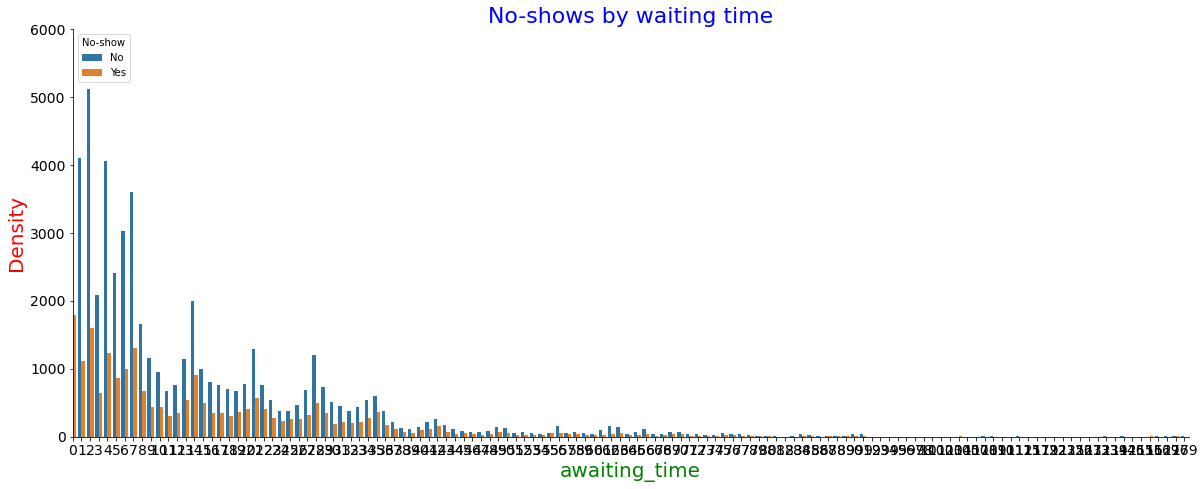

In [24]:
#Are No-shows affected by wait times?
ByWaitingTime = pd.DataFrame(df.groupby(["No-show", "Awaitingtime"])["No-show"]
                     .count()
                     .reset_index(name = "count"))

#Let's visualise via barplot
g = sns.barplot("Awaitingtime","count", data = ByWaitingTime, hue = "No-show")
sns.despine()
g.figure.set_size_inches(20,7.5)
g.axes.set_title('No-shows by waiting time', fontsize=22,color="b")
g.set_xlabel("awaiting_time",size = 20,color="g")
g.set_ylabel("Density",size = 20,color="r")
plt.ylim(0, 6000)
#plt.ylim(20000, 35000)
plt.xlim(0, None)

g.tick_params(labelsize=14,labelcolor="black")

In [27]:
#How many skipped appointment even after sms reminder
df.groupby(["SMS_received", "No-show"])["No-show"].count()


SMS_received  No-show
0             No         62510
              Yes        12530
1             No         25698
              Yes         9784
Name: No-show, dtype: int64

In [28]:
#How Hypertension affects 
df.groupby(["Hipertension","No-show"])["No-show"].count()

Hipertension  No-show
0             No         70179
              Yes        18542
1             No         18029
              Yes         3772
Name: No-show, dtype: int64

In [29]:
#Alcoholism effect on No-show
df.groupby(["Alcoholism", "No-show"])["No-show"].count()

Alcoholism  No-show
0           No         85525
            Yes        21637
1           No          2683
            Yes          677
Name: No-show, dtype: int64

In [30]:
#Handcap effect on No-show
df.groupby(["Handcap", "No-show"])["No-show"].count()

Handcap  No-show
0        No         86374
         Yes        21909
1        No          1676
         Yes          364
2        No           146
         Yes           37
3        No            10
         Yes            3
4        No             2
         Yes            1
Name: No-show, dtype: int64

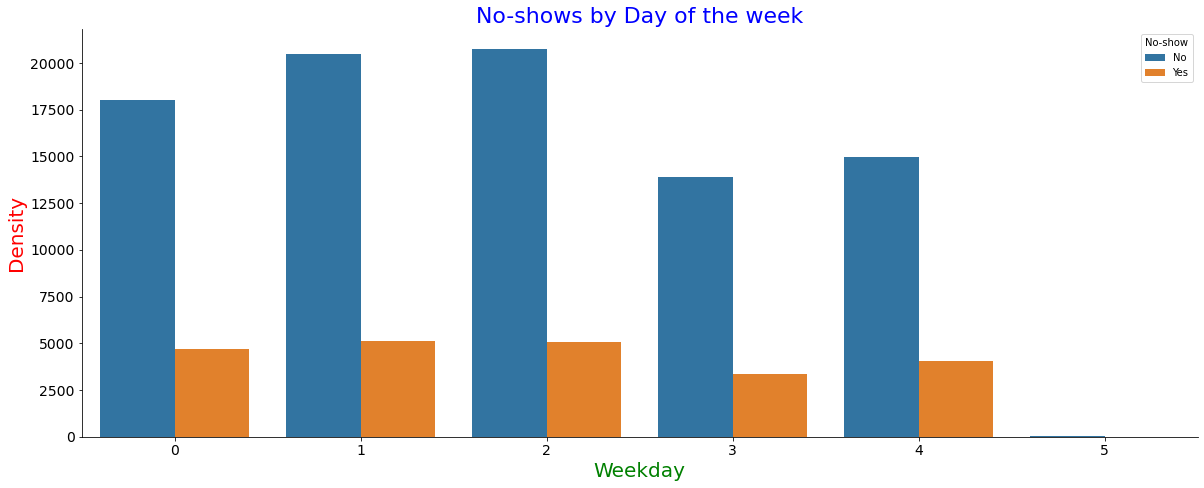

In [31]:
#what Weekday most of the appointments skipped?
ByWeekday = pd.DataFrame(df.groupby(["No-show", "Weekday"])["No-show"]
                     .count()
                     .reset_index(name = "count"))


g = sns.barplot("Weekday","count", data = ByWeekday, hue = "No-show")
sns.despine()
g.figure.set_size_inches(20,7.5)
g.axes.set_title('No-shows by Day of the week', fontsize=22,color="b")
g.set_xlabel("Weekday",size = 20,color="g")
g.set_ylabel("Density",size = 20,color="r")
g.tick_params(labelsize=14,labelcolor="black")

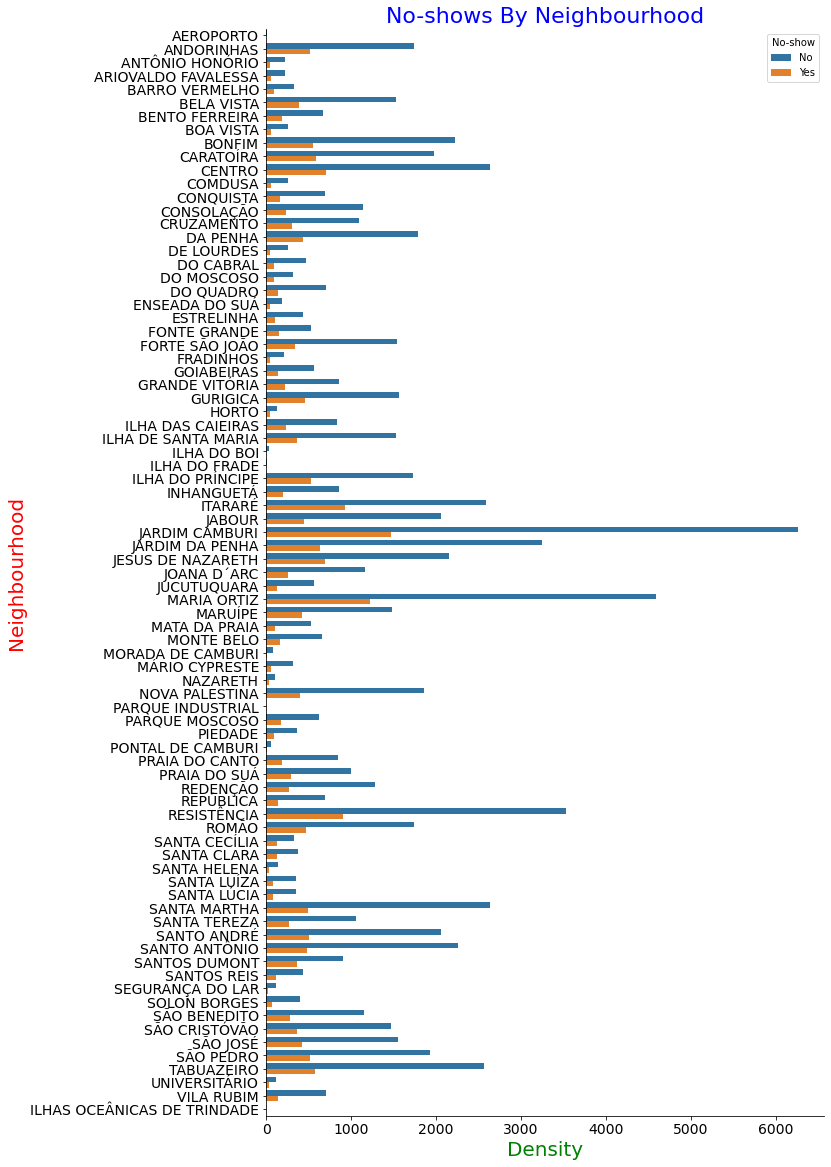

In [32]:
#What Neighbourhood mostly skip appointment
ByNeighbourhood = pd.DataFrame(df.groupby(["No-show", "Neighbourhood"])["No-show"]
                     .count()
                     .reset_index(name = "count"))
g = sns.barplot("count","Neighbourhood", data = ByNeighbourhood, hue = "No-show")
sns.despine()
g.figure.set_size_inches(10,20)
g.axes.set_title('No-shows By Neighbourhood', fontsize=22,color="b")
g.set_xlabel("Density",size = 20,color="g")
g.set_ylabel("Neighbourhood", size = 20,color="r")
g.tick_params(labelsize=14,labelcolor="black")

In [33]:
df['Time'] = pd.to_datetime(df['AppointmentDay']).dt.time
df['hour'] = df['AppointmentDay'].dt.hour

In [34]:
df[:5]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,ScheduledDate,Awaitingtime,Weekday,Time,hour
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0


## Modeling

In [35]:
#Before modeling let's see how is the sample balance
df["No-show"].value_counts()

No     88208
Yes    22314
Name: No-show, dtype: int64

### Basic modeling

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score, roc_curve,auc, confusion_matrix, plot_confusion_matrix

In [37]:
#make data ready for modeling
df[:5]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,ScheduledDate,Awaitingtime,Weekday,Time,hour
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,2016-04-29,0,4,00:00:00,0


In [38]:
# Select the target variable and drop it from the df for data wrangling
df1 = df.copy()
df1["No-show"] = df1["No-show"].map({'Yes': 1, 'No': 0})
df1["Gender"] = df1["Gender"].map({"M": 1, "F": 0})

In [39]:
#There are around 100 odd locations in the Neighbourhood data. When we take dummy with all the
#locatons the column will be more tahn 100 
df1.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Awaitingtime,Weekday,hour
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.0
mean,1.474935e+14,5.675305e+06,0.350021,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,0.201896,10.184253,1.858264,0.0
std,2.560866e+14,7.129722e+04,0.476978,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,0.401417,15.255115,1.371683,0.0
min,3.921700e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.172536e+12,5.640284e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,3.173700e+13,5.680574e+06,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,0.0
75%,9.439277e+13,5.725525e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,3.000000,0.0
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000,5.000000,0.0


In [40]:
#lets see how many

print("Less than 1000:", df1["Neighbourhood"].value_counts()
      [df1["Neighbourhood"].value_counts() < 1000].sum())

print('Between 1000 and 2000:', df1["Neighbourhood"].value_counts()
      [(df1["Neighbourhood"].value_counts() > 1000) & 
        (df1["Neighbourhood"].value_counts() < 2000)].sum())

print('Between 2000 and 3000:', df1["Neighbourhood"].value_counts()
      [(df1["Neighbourhood"].value_counts() > 2000) & 
        (df1["Neighbourhood"].value_counts() < 3000)].sum())

print('Between 3000 and 8000:', df1["Neighbourhood"].value_counts()
      [(df1["Neighbourhood"].value_counts() > 3000) & 
        (df1["Neighbourhood"].value_counts() < 8000)].sum())

Less than 1000: 17160
Between 1000 and 2000: 26718
Between 2000 and 3000: 31705
Between 3000 and 8000: 34939


In [41]:
#make a list of Neighbourhood based on their appointment frequency.
lessthanThousand = list(df1["Neighbourhood"]
                     .value_counts()[df1["Neighbourhood"]
                     .value_counts() < 1000].index)
Btn_1000_2000 = list(df1["Neighbourhood"].value_counts()
                [(df1["Neighbourhood"].value_counts() > 1000) & 
                (df1["Neighbourhood"].value_counts() < 2000)].index)

Btn_2000_3000 = list(df1["Neighbourhood"].value_counts()
                [(df1["Neighbourhood"].value_counts() > 2000) & 
                (df1["Neighbourhood"].value_counts() < 3000)].index)

Btn_3000_8000 = list(df1["Neighbourhood"].value_counts()
                [(df1["Neighbourhood"].value_counts() > 3000) & 
                (df1["Neighbourhood"].value_counts() < 8000)].index)
print(len(lessthanThousand), len(Btn_1000_2000), len(Btn_2000_3000), len(Btn_3000_8000))

42 18 13 8


In [42]:
# fill the neibourhood name accordingly with frequency of appointments
df1['NewNeighbourhood'] = df1.Neighbourhood.isin(lessthanThousand)
df1['NewNeighbourhood'] = (df1
                         .apply(lambda x: 'lessthanThousand' if x.NewNeighbourhood else x.Neighbourhood, axis=1))

In [43]:
len(df1["NewNeighbourhood"].unique())

40

In [44]:
df1[:10]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,AppointmentDate,ScheduledDate,Awaitingtime,Weekday,Time,hour,NewNeighbourhood
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,0,0,0,2016-04-29,2016-04-29,0,4,00:00:00,0,JARDIM DA PENHA
1,558997776694438,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,0,0,0,2016-04-29,2016-04-29,0,4,00:00:00,0,JARDIM DA PENHA
2,4262962299951,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,0,0,0,2016-04-29,2016-04-29,0,4,00:00:00,0,lessthanThousand
3,867951213174,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,0,0,0,2016-04-29,2016-04-29,0,4,00:00:00,0,lessthanThousand
4,8841186448183,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,0,0,0,2016-04-29,2016-04-29,0,4,00:00:00,0,JARDIM DA PENHA
5,95985133231274,5626772,0,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,...,0,0,0,2016-04-29,2016-04-27,2,4,00:00:00,0,lessthanThousand
6,733688164476661,5630279,0,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,...,0,0,1,2016-04-29,2016-04-27,2,4,00:00:00,0,lessthanThousand
7,3449833394123,5630575,0,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,...,0,0,1,2016-04-29,2016-04-27,2,4,00:00:00,0,lessthanThousand
8,56394729949972,5638447,0,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,...,0,0,0,2016-04-29,2016-04-29,0,4,00:00:00,0,ANDORINHAS
9,78124564369297,5629123,0,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,...,0,0,0,2016-04-29,2016-04-27,2,4,00:00:00,0,lessthanThousand


In [45]:
df1.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'AppointmentDate', 'ScheduledDate', 'Awaitingtime', 'Weekday', 'Time',
       'hour', 'NewNeighbourhood'],
      dtype='object')

In [46]:
df1["No-show"].value_counts()

0    88208
1    22314
Name: No-show, dtype: int64

In [47]:
#get dummies
dummies = pd.get_dummies(df1["NewNeighbourhood"])
dummies.shape


(110522, 40)

In [48]:
data = df1.drop(["AppointmentID", "ScheduledDay", "AppointmentDay", "Neighbourhood",
                "AppointmentDate", "ScheduledDate", "Time", "hour","NewNeighbourhood"], axis = 1)
print(data.shape, df1.shape)

(110522, 12) (110522, 21)


In [49]:
final_data = pd.concat([data, dummies], axis = 1)
print(final_data.shape)

(110522, 52)


In [50]:
final_data["PatientId"].nunique()

62299

In [51]:
final_data = final_data[~ final_data["Age"] < 0]

In [52]:
final_datal = final_data.dropna()

In [116]:
final_data.to_csv("final_data.csv")

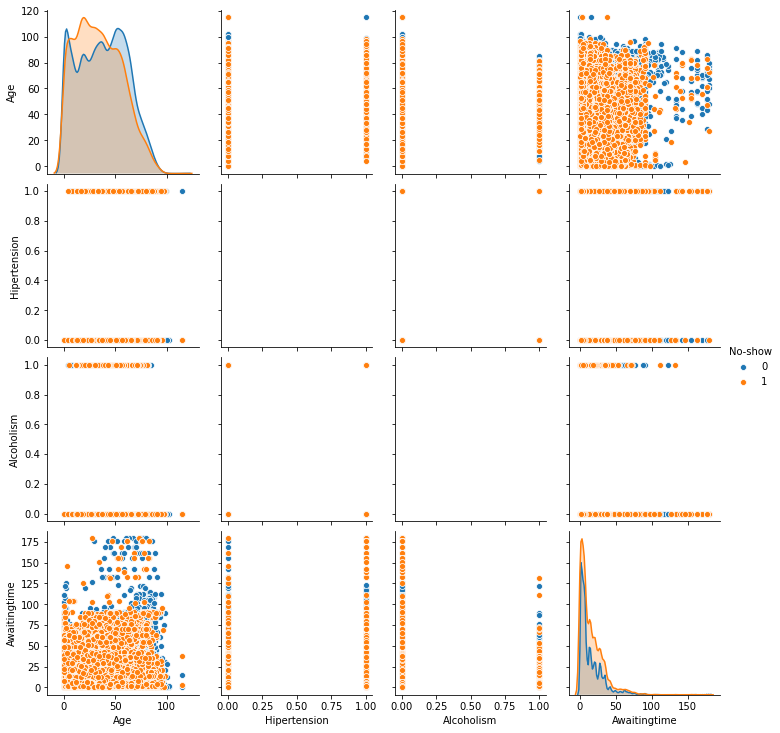

In [53]:
# We want to pick one feature to start that separates the two cases. Look down the diagonal to find an example 
# of a feature that well separates the data
sns.pairplot(final_data[["Age", "Hipertension", "Alcoholism", "Awaitingtime", "No-show"]], 
             diag_kind='kde', hue = "No-show")

In [54]:
#Scale before run the model so that standardization is applicable to 
#training, val and test sets
scale = StandardScaler()
final_data["Age_scaled"] = pd.DataFrame(scale.fit_transform(final_data["Age"].values.reshape(-1,1)))
final_data = final_data.dropna()


In [55]:
X, y = final_data.drop(["PatientId","Age", "No-show"], axis = 1), final_data["No-show"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25,
                                                    random_state =10)

print(X_train.shape, X_val.shape, X_test.shape)

(62164, 50) (20722, 50) (27629, 50)


In [56]:
X_train.columns

Index(['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handcap', 'SMS_received', 'Awaitingtime', 'Weekday', 'ANDORINHAS',
       'BELA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'CONSOLAÇÃO',
       'CRUZAMENTO', 'DA PENHA', 'FORTE SÃO JOÃO', 'GRANDE VITÓRIA',
       'GURIGICA', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA',
       'ILHA DO PRÍNCIPE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI',
       'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'MARIA ORTIZ',
       'MARUÍPE', 'NOVA PALESTINA', 'PRAIA DO CANTO', 'PRAIA DO SUÁ',
       'REDENÇÃO', 'RESISTÊNCIA', 'ROMÃO', 'SANTA MARTHA', 'SANTA TEREZA',
       'SANTO ANDRÉ', 'SANTO ANTÔNIO', 'SANTOS DUMONT', 'SÃO BENEDITO',
       'SÃO CRISTÓVÃO', 'SÃO JOSÉ', 'SÃO PEDRO', 'TABUAZEIRO',
       'lessthanThousand', 'Age_scaled'],
      dtype='object')

In [113]:
#Logistic regression with different class weights

classweights = ["balanced",{0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}]

for w in classweights:
    lg = LogisticRegression(class_weight = w)
    lg.fit(X_train, y_train)
    print(f'{w}:{lg.score(X_train, y_train)}')


balanced:0.6620173745173745
{0: 1, 1: 2}:0.7680341055341056
{0: 1, 1: 3}:0.7184684684684685
{0: 1, 1: 5}:0.5735360360360361


In [57]:
#Let's choose class weights of better score and run model again
lg = LogisticRegression(class_weight={0: 1, 1: 3})
lg.fit(X_train, y_train)
lg.score(X_train, y_train)
lg_y_pred = lg.predict(X_val)
print(accuracy_score(y_val, lg_y_pred),
      precision_score(y_val, lg_y_pred),
      recall_score(y_val, lg_y_pred),
      f1_score(y_val, lg_y_pred))
                                      

0.7198146897017662 0.32919128132002445 0.3913780576410753 0.3576012392122151


In [59]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot= True, fmt="d", cmap = 'Blues')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
   
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)
    return fig


Logistic regression confusion matrix: 

 [[13300  3293]
 [ 2513  1616]]


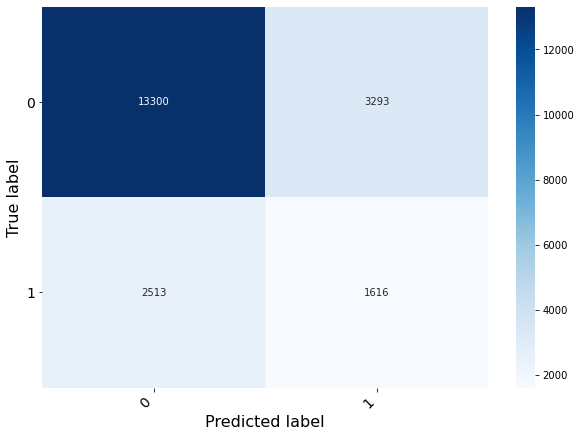

In [60]:
#Plot confusion matrix
print("Logistic regression confusion matrix: \n\n", confusion_matrix(y_val, lg.predict(X_val)))
cm = print_confusion_matrix(confusion_matrix(y_val, lg.predict(X_val)), ['0', '1'])

In [110]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.665379 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.661620 (0.008844) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.661671 (0.008920) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.661616 (0.008846) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.661626 (0.008844) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.661626 (0.008882) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.661621 (0.008846) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.661683 (0.008849) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.661721 (0.008841) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.661674 (0.008850) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.662258 (0.008869) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.662259 (0.008872) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.662180 (0.008879) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.665357 (0.009027) with: 

In [113]:
#Let's choose class weights of better score and run model again
lg = LogisticRegression(C = 0.01, class_weight={0: 1, 1: 3},
                        penalty = "l2", solver = "lbfgs")
lg.fit(X_train, y_train)
lg.score(X_train, y_train)
lg_y_pred = lg.predict(X_val)
print(accuracy_score(y_val, lg_y_pred),
      precision_score(y_val, lg_y_pred),
      recall_score(y_val, lg_y_pred),
      f1_score(y_val, lg_y_pred))
                                      

0.7215519737477077 0.33008904535100436 0.38604989101477355 0.3558830096003572


Logistic regression confusion matrix: 

 [[13358  3235]
 [ 2535  1594]]


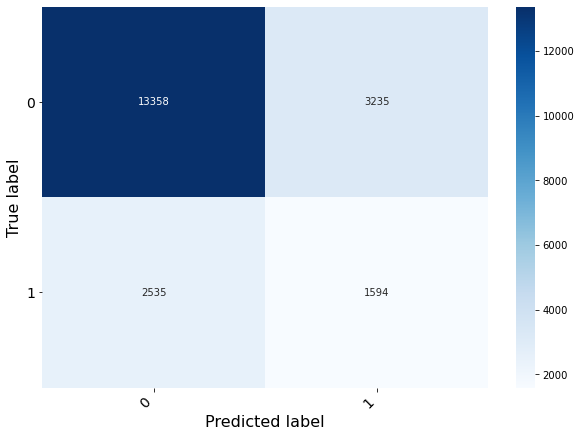

In [114]:
#Plot confusion matrix
print("Logistic regression confusion matrix: \n\n", confusion_matrix(y_val, lg.predict(X_val)))
cm = print_confusion_matrix(confusion_matrix(y_val, lg.predict(X_val)), ['0', '1'])

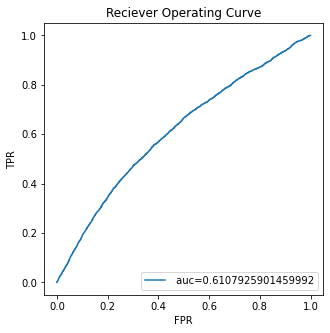

In [115]:
prob = log_sm.predict_proba(X_val)[:,1]
plt.figure(figsize = (5, 5))
fpr_log, tpr_log, thresholds = roc_curve(y_val,prob)
auc = np.trapz(tpr_log,fpr_log)
plt.plot(fpr_log,tpr_log,label=" auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Reciever Operating Curve')
plt.legend(loc=4)
plt.show()

## Oversmapling with smote and LR

In [61]:
X, y = final_data.drop(["PatientId","Age", "No-show"], axis = 1), final_data["No-show"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25,
                                                    random_state =10)
print(X_train.shape, X_val.shape, X_test.shape)

(62164, 50) (20722, 50) (27629, 50)


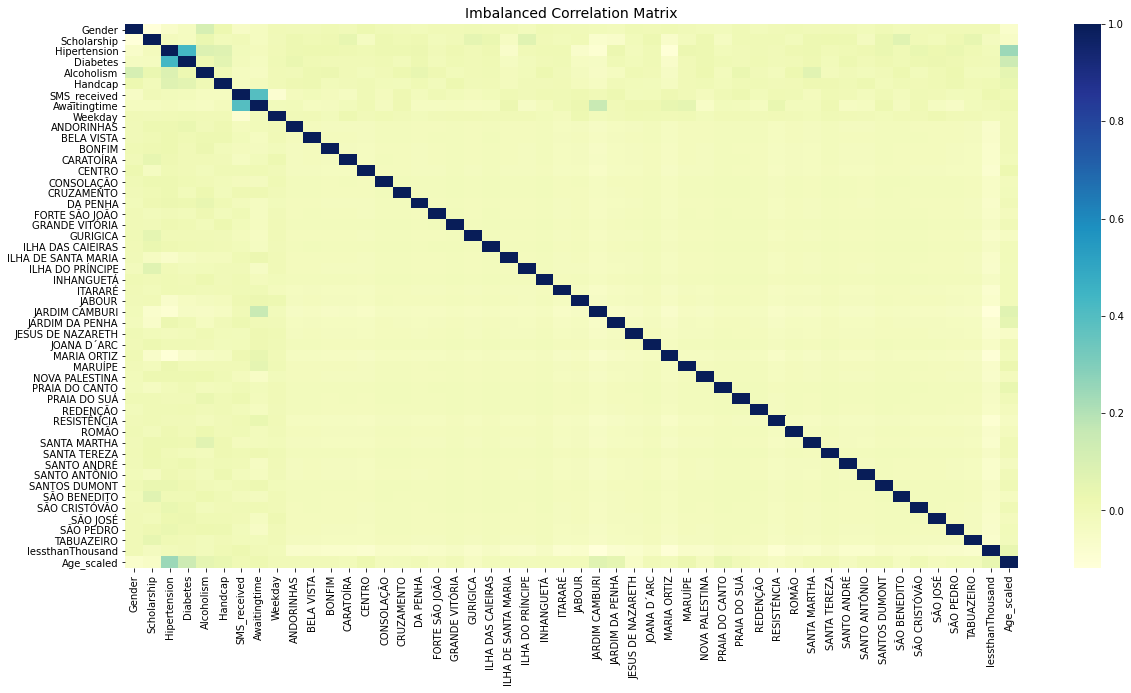

In [63]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = X_train.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [65]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(sampling_strategy= "minority",random_state=42).fit_sample(X_train,y_train)
print(y_train.value_counts(), np.bincount(y_smoted))

0    49589
1    12575
Name: No-show, dtype: int64 [49589 49589]


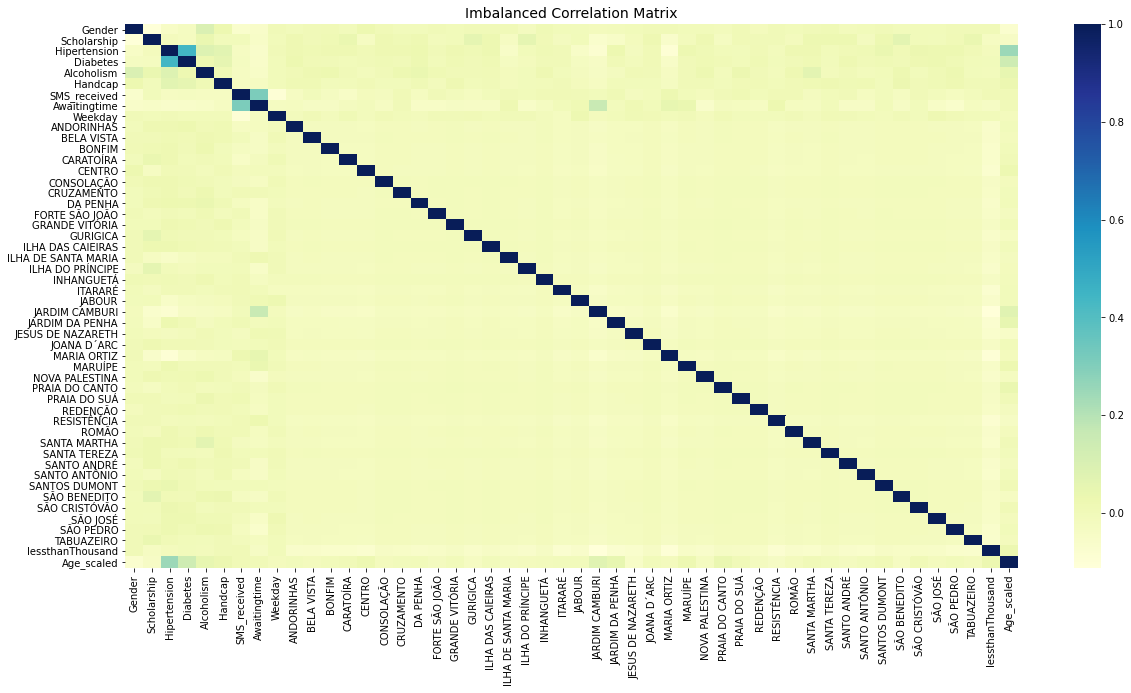

In [66]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = X_smoted.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [67]:
log_sm = LogisticRegression()
log_sm.fit(X_smoted, y_smoted)
y_pred = log_sm.predict(X_val)
print(accuracy_score(y_val, y_pred),
      precision_score(y_val, y_pred),
      recall_score(y_val, y_pred),
      f1_score(y_val, y_pred))

0.6832352089566645 0.2915596644410204 0.41244853475417775 0.34162487462387164


LogisticRegression confusion matrix: 

 [[12455  4138]
 [ 2426  1703]]


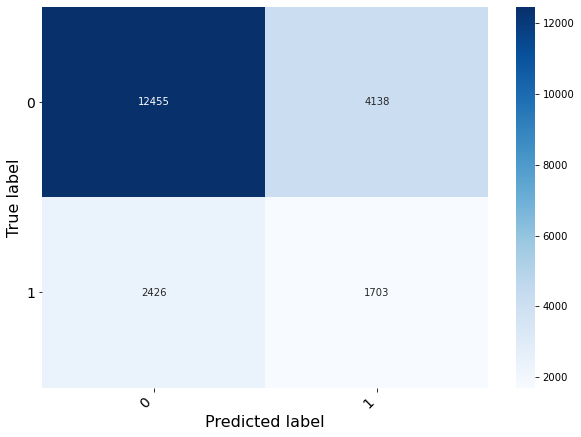

In [68]:
print("LogisticRegression confusion matrix: \n\n", confusion_matrix(y_val, log_sm.predict(X_val)))
cm = print_confusion_matrix(confusion_matrix(y_val, log_sm.predict(X_val)), ['0', '1'])

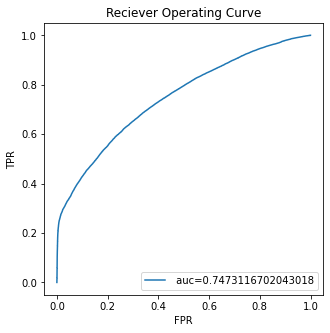

In [69]:
prob = log_sm.predict_proba(X_smoted)[:,1]
plt.figure(figsize = (5, 5))
fpr_log, tpr_log, thresholds = roc_curve(y_smoted,prob)
auc = np.trapz(tpr_log,fpr_log)
plt.plot(fpr_log,tpr_log,label=" auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Reciever Operating Curve')
plt.legend(loc=4)
plt.show()

## Over sampling - ADASYN(ADAptive SYNthetic oversampling)

In [324]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X_train,y_train)
print(X_train.shape, X_adasyn.shape,y_train.shape, y_adasyn.shape, np.bincount(y_adasyn))

(62164, 50) (98946, 50) (62164,) (98946,) [49589 49357]


In [346]:
log_ada = LogisticRegression()
log_ada.fit(X_adasyn, y_adasyn)
y_pred = log_ada.predict(X_val)
print("Acc_score:",accuracy_score(y_val, y_pred), '\n'
      "pre_score:", precision_score(y_val, y_pred), '\n'
      "recall_score:",recall_score(y_val, y_pred), '\n'
      "f1_score:",f1_score(y_val, y_pred))

Acc_score: 0.6934176237814883 
pre_score: 0.2929236499068901 
recall_score: 0.3809639137805764 
f1_score: 0.3311927571323297


LogisticRegression confusion matrix: 

 [[16899  5120]
 [ 3517  2093]]


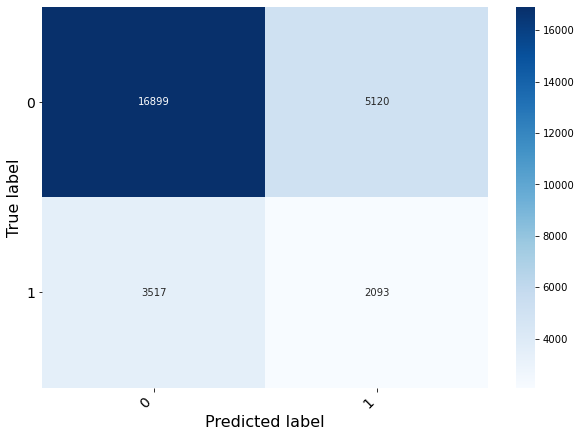

In [333]:
#Plot confusion matrix
print("LogisticRegression confusion matrix: \n\n", confusion_matrix(y_test, log_ada.predict(X_test)))
cm = print_confusion_matrix(confusion_matrix(y_test, log_ada.predict(X_test)), ['0', '1'])

## XGBoost

In [117]:
#Grid search to find best parameters for XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
model = XGBClassifier()
weights = [0.02, 0.04,0.06,0.08, 1]
param_grid = dict(scale_pos_weight=weights)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.721806 using {'scale_pos_weight': 0.02}


In [118]:
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{round(mean, 4)}({round(stdev, 4)}) with: {param}")

0.7218(0.0061) with: {'scale_pos_weight': 0.02}
0.7213(0.0063) with: {'scale_pos_weight': 0.04}
0.7212(0.0062) with: {'scale_pos_weight': 0.06}
0.7211(0.0059) with: {'scale_pos_weight': 0.08}
0.7192(0.0059) with: {'scale_pos_weight': 1}


In [119]:
from sklearn.metrics import roc_auc_score
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=6, max_features='sqrt', min_child_weight=1, missing=None,
       n_estimators=75, n_jobs=1, nthread=None,scoring = 'roc_auc',
       objective='binary:logistic', random_state=10, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.5)

In [120]:
xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train))
preds = xgb.predict(X_val)
prob = xgb.predict_proba(X_val)
print(accuracy_score(y_val, preds),
      precision_score(y_val, preds),
      recall_score(y_val, preds),
      f1_score(y_val, preds),
     roc_auc_score(y_val, preds))

[16:42:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { max_features, scoring, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.7999324367801299
0.8004536241675514 0.4594594594594595 0.008234439331557278 0.01617891981917678 0.5029118921180176


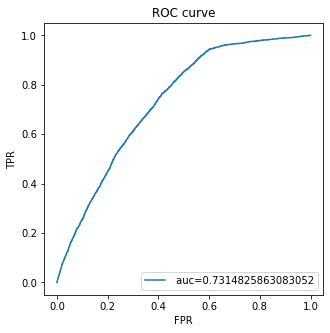

In [121]:
prob = xgb.predict_proba(X_val)[:,1]
plt.figure(figsize = (5, 5))
fpr_logit, tpr_logit, thresholds = roc_curve(y_val,prob)
auc_val = np.trapz(tpr_logit,fpr_logit)
plt.plot(fpr_logit,tpr_logit,label=" auc="+str(auc_val))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc=4)
plt.show()

XGBoost: 

 [[16553    40]
 [ 4095    34]]


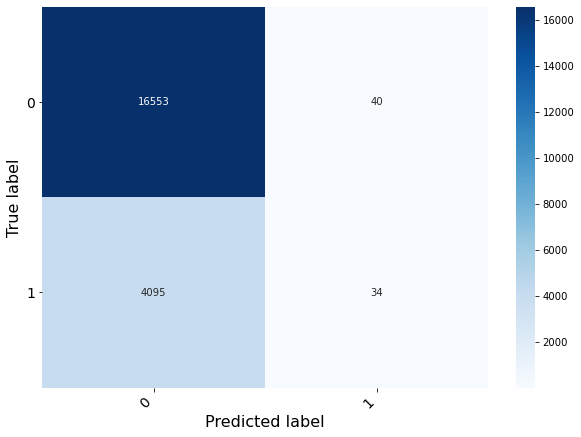

In [122]:
#Plot confusion matrix
print("XGBoost: \n\n", confusion_matrix(y_val, xgb.predict(X_val)))
cm = print_confusion_matrix(confusion_matrix(y_val, xgb.predict(X_val)), ['0', '1'])

- 25% sample is are attending the appointment in our data which is aligning with research by Forbes and pits burgh 

Patient No-Shows: 
- Who does it, why, and what you can do to change it You’ve experienced it: idle physicians, waiting patients, and last minute vacancies—no-shows put patients behind in their care and negatively impact downstream processes.

- Patient no-shows cost the health care industry 150 billion annually For a primary care physician, each missed appointment equals roughly 150-200 dollers in lost revenue. For surgeons, this is closer to 500 dollars.
- Patients who fail to show up for their appointments often require more expensive emergency care later on. These higher costs get factored into health care costs for everyone else

Why It’s Important to Track Your Patient No-Show Rate:

- Medical practices should track their patient no-show rates because without accurate numbers to reflect baseline data and progress, it’s impossible to quantify the results of any efforts to reduce patient no-shows. Have reliable no-show data is also important because it represents lost revenue for the practice or medical group. Recapturing that revenue can mean financial health for a medical practice and can be used to add staff, invest in new or additional resources, upgrade technology, and improve employee salaries and benefits. For example: if a single-provider practice averages two no-shows daily, the missed revenue (approximately 104,000 annually) could mean the ability to add 1-2 full-time staff members.

How you define a “no-show” is just as important as establishing a way to track it. In our experience, we’ve seen two common mistakes that can unintentionally result in misleading data:

1. Including cancellations and appointment changes into their no-show rates

2. Marking a no-show as “canceled” 

Practices in both of these scenarios struggle because they are operating with bad numbers.  

**These are the top five reasons patients miss their appointments** 

Forgetfulness
- Forgetfulness is the #1 reason patients report for not showing up for their appointments; to compound this problem, 24% of patients in one survey said they tried to cancel their appointment but couldn’t.

Time
- Patients will often accept an appointment that isn’t convenient because it appears to be their only option but will later no-show because their schedules truly couldn’t accommodate the appointment dates and/or times from the beginning.

Cost
- While the rate of insured patients has dropped in recent years, copays, deductibles, and out-of-pocket expenses have risen dramatically. Patients fearing they won’t be able to afford their portions of their medical bills will sometimes avoid appointments altogether because they are too embarrassed to discuss the financial burden.

Fear
- Patients have anxiety about visiting their providers—these anxieties and fears are easily overlooked by clinical staff who handle medical interactions on a daily basis. Procedures, bad news, and disapproval from a physician can all be contributing fears that cause patients to avoid their appointments.

Demographic barriers
- Language and age are two examples of demographic barriers that can result in a patient no-show. Consider the elderly patient who no longer drives, a failure or unforeseen change to their transportation plan may leave them without a way to get to their appointment and without the time to notify the clinic.

**How to Deal with Patient No-Shows**
Strategies That Don’t Work for Reducing Patient No-Shows
- We can impact nearly every reason that patients no-show with patient-centered communication. Of course, for every great strategy that delivers results, there’s one that didn’t pan out and we’ve seen it all. First generation solutions to patient no-shows were well-intentioned but failed to deliver results, here a few of the most common.

**No-Show Appointment Policy: Charging Patients for Missed Appointments**

Roughly 25% of physician practices charge some kind of no-show fee. Practices use this strategy in hopes that charging a fee will force a patient to connect value to a physician’s time, will recover a small portion of lost reimbursement, and will alter patient behavior even if a practice never intends to collect the fee. Charging a fee for missed appointments yields only small improvements in patient no-show rates, partly because many practices fail to inform patients they have no-show policies in place. In a recent survey, MGMA found that 41.6% of patients who missed an appointment, said they were unaware of their doctor’s no-show policy. This strategy also creates additional work for staff and fails to address many of the underlying reasons that patients miss their appointments. Finally, Medicaid doesn’t allow medical practices to charge patients for missed appointments in some states yet Medicaid patients are one of the more likely patient types to no-show, rendering this type of no-show strategy ineffective for a large percentage of a practice’s patients.

Voice-Only Appointment Reminders

- Voice-only appointment reminders fall short because patients rarely answer their phones or respond to voicemail. Robocalls and phone scams have dissolved consumer trust in phone calls from numbers that they don’t recognize and most prefer to communicate via text. The success of voice-only reminders hinge on patients answering their phones because if the call is missed, the patient has no opportunity to confirm, cancel, or reschedule the appointment—something that is pivotal to a successful no-show reduction strategy.

Double Booking Appointments

- Double booking appointments banks on the probability that a patient won’t show up for their appointment. When patients do show up as scheduled, the results are long wait times, frustrated patients, and minimal time with a provider— all of which put the hard-earned reputation of the practice in jeopardy and require double the work for staff. While double booking may serve as a short-term solution, in the end it requires more work for the same amount of revenue.